# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** Abdul Hafidz
- **Email:** abdulhafidz728@gmail.com
- **ID Dicoding:** abdulhafidz

## Menentukan Pertanyaan Bisnis

- **Pertanyaan 1:** Produk kategori apa yang paling banyak terjual (paling laris) dan paling sedikit terjual?
- **Pertanyaan 2:** Bagaimana demografi pelanggan berdasarkan negara bagian (state) tempat tinggal mereka?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_path = "/content/drive/MyDrive/Colab Notebooks/e-commerce_dataset/"

orders_df = pd.read_csv(base_path + "orders_dataset.csv")
items_df = pd.read_csv(base_path + "order_items_dataset.csv")
products_df = pd.read_csv(base_path + "products_dataset.csv")
customers_df = pd.read_csv(base_path + "customers_dataset.csv")
category_translation_df = pd.read_csv(base_path + "product_category_name_translation.csv")

print("Sukses load data dari Google Drive!")

Sukses load data dari Google Drive!


In [ ]:
print("Data Orders:", orders_df.shape)
print("Data Items:", items_df.shape)
print("Data Products:", products_df.shape)
print("Data Customers:", customers_df.shape)

orders_df.head()

Data Orders: (99441, 8)
Data Items: (112650, 7)
Data Products: (32951, 9)
Data Customers: (99441, 5)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- **Berhasil memuat 5 dataset utama** yang diperlukan untuk analisis.
- **Volume Data:** Dataset `orders` dan `customers` memiliki jumlah baris yang sama (99,441), mengindikasikan setiap transaksi terhubung dengan satu data pelanggan.
- **Hubungan One-to-Many:** Tabel `order_items` memiliki 112,650 baris, yang lebih banyak dari jumlah transaksi. Ini menunjukkan bahwa satu Order ID bisa memiliki lebih dari satu item (produk) di dalamnya.
- **Variasi Produk:** Terdapat 32,951 jenis produk unik dalam katalog yang siap dianalisis.

### Assessing Data

In [ ]:
print("=== INFO DATA ORDERS ===")
orders_df.info()
print("\n=== INFO DATA ITEMS ===")
items_df.info()
print("\n=== INFO DATA PRODUCTS ===")
products_df.info()
print("\n=== INFO DATA CUSTOMERS ===")
customers_df.info()

# Cek Missing Value
print("\n=== JUMLAH DATA HILANG (MISSING VALUES) ===")
print("Orders Missing:\n", orders_df.isnull().sum())
print("\nItems Missing:\n", items_df.isnull().sum())
print("\nProducts Missing:\n", products_df.isnull().sum())
print("\nCustomers Missing:\n", customers_df.isnull().sum())

# Cek Duplikat
print("\n=== JUMLAH DATA DUPLIKAT ===")
print("Orders Duplicates:", orders_df.duplicated().sum())
print("Items Duplicates:", items_df.duplicated().sum())
print("Products Duplicates:", products_df.duplicated().sum())
print("Customers Duplicates:", customers_df.duplicated().sum())

=== INFO DATA ORDERS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB

=== INFO DATA ITEMS ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  


**Insight:**
1. **Masalah Tipe Data:**
   - Pada tabel `orders_df`, kolom-kolom yang berkaitan dengan tanggal (seperti `order_purchase_timestamp`, `order_delivered_customer_date`, dll) saat ini masih bertipe **object (string)**.
   - **Tindakan:** Kolom-kolom ini harus diubah menjadi tipe **datetime** pada tahap *Cleaning Data* agar bisa kita ambil komponen bulannya untuk analisis tren waktu.

2. **Masalah Data Hilang:**
   - **Products:** Terdapat **610 data** produk yang tidak memiliki informasi kategori (`product_category_name`). Ini perlu diisi dengan label "unknown" atau sejenisnya agar tidak hilang saat dianalisis.
   - **Orders:** Terdapat cukup banyak *missing value* pada kolom `order_delivered_customer_date` (2.965 baris). Hal ini wajar secara bisnis, mengindikasikan bahwa pesanan tersebut mungkin statusnya *canceled*, *unavailable*, atau sedang dalam pengiriman (*invoiced/shipped*).

3. **Duplikasi:**
   - **Sangat Baik.** Tidak ditemukan data duplikat (jumlah duplikat = 0) pada keempat tabel yang diperiksa. Ini berarti setiap baris data merepresentasikan entitas unik.

### Cleaning Data

In [ ]:
# 1. MEMPERBAIKI TIPE DATA
datetime_columns = ["order_purchase_timestamp", "order_estimated_delivery_date"]
for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

# 2. MEMPERBAIKI MISSING VALUES
products_df['product_category_name'] = products_df['product_category_name'].fillna("unknown")

# 3. MENGGABUNGKAN DATA
products_clean = pd.merge(
    left=products_df,
    right=category_translation_df,
    how="left",
    on="product_category_name"
)
products_clean['product_category_name_english'] = products_clean['product_category_name_english'].fillna(products_clean['product_category_name'])

# Merge 2: Gabungkan Orders dengan Items
main_data = pd.merge(
    left=orders_df,
    right=items_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Merge 3: Tambahkan Info Produk (Kategori) ke Main Data
main_data = pd.merge(
    left=main_data,
    right=products_clean[['product_id', 'product_category_name_english']],
    how="left",
    on="product_id"
)

# Merge 4: Tambahkan Info Customer (Lokasi) ke Main Data
main_data = pd.merge(
    left=main_data,
    right=customers_df[['customer_id', 'customer_city', 'customer_state']],
    how="left",
    on="customer_id"
)

# --- 4. FILTERING ---
main_data = main_data[main_data['order_status'] == 'delivered']

# Hapus baris yang tidak ada items-nya
main_data.dropna(subset=['order_item_id'], inplace=True)

print("Data Cleaning Selesai!")
print("Jumlah Baris Data Bersih:", main_data.shape[0])
print("\nContoh 5 Data Teratas:")
main_data.head()

Data Cleaning Selesai!
Jumlah Baris Data Bersih: 110197

Contoh 5 Data Teratas:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,housewares,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumery,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,auto,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,pet_shop,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,stationery,santo andre,SP


**Insight:**
- **Perbaikan Tipe Data:** Kolom tanggal (`order_purchase_timestamp`, dll) yang sebelumnya bertipe *object* (string) telah berhasil diubah menjadi tipe *datetime*. Hal ini memungkinkan kita untuk melakukan analisis berbasis waktu (time-series) nantinya.
- **Penggabungan Data (Merging):** Data yang sebelumnya terpisah-pisah dalam 5 tabel berbeda (`orders`, `items`, `products`, `customers`, `translation`) kini telah disatukan menjadi satu dataset utuh bernama `main_data`.
- **Penanganan Missing Values:** Nilai kosong pada kategori produk telah diisi dengan label "unknown" untuk mencegah hilangnya data saat analisis.
- **Filtering Data:** Proses pembersihan juga telah memfilter data hanya untuk pesanan dengan status `delivered` (berhasil dikirim) agar analisis bisnis lebih akurat dan valid.
- **Volume Data Bersih:** Setelah proses cleaning dan merging, didapatkan total **110.197 baris data** yang siap untuk tahap Exploratory Data Analysis (EDA).

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
# 1. EKSPLORASI PRODUK (Pertanyaan 1)
# Hitung jumlah penjualan per kategori
sum_order_items_df = main_data.groupby("product_category_name_english").product_id.count().sort_values(ascending=False).reset_index()
sum_order_items_df.rename(columns={
    "product_id": "quantity"
}, inplace=True)

# 2. EKSPLORASI CUSTOMER (Pertanyaan 2)
# Hitung jumlah customer per negara bagian (State)
bystate_df = main_data.groupby(by="customer_state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)

# Cek hasil
print("Top 5 Kategori Terlaris:\n", sum_order_items_df.head())
print("\nTop 5 Lokasi Customer Terbanyak:\n", bystate_df.sort_values(by='customer_count', ascending=False).head())

Top 5 Kategori Terlaris:
   product_category_name_english  quantity
0                bed_bath_table     10953
1                 health_beauty      9465
2                sports_leisure      8431
3               furniture_decor      8160
4         computers_accessories      7644

Top 5 Lokasi Customer Terbanyak:
    customer_state  customer_count
25             SP           40501
18             RJ           12350
10             MG           11354
22             RS            5345
17             PR            4923


**Insight:**
- **Analisis Produk:** Kategori **`bed_bath_table`** menempati urutan pertama sebagai produk terlaris dengan total 10.953 item terjual. Diikuti oleh `health_beauty` dan `sports_leisure`. Ini menunjukkan minat belanja yang tinggi pada kebutuhan harian dan gaya hidup.
- **Analisis Demografi:** Terdapat dominasi yang sangat signifikan dari negara bagian **SP (Sao Paulo)** dengan total 40.501 pelanggan. Jumlah ini hampir 4 kali lipat lebih banyak dibandingkan negara bagian di posisi kedua, RJ (Rio de Janeiro).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

/tmp/ipython-input-1282429574.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipython-input-1282429574.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


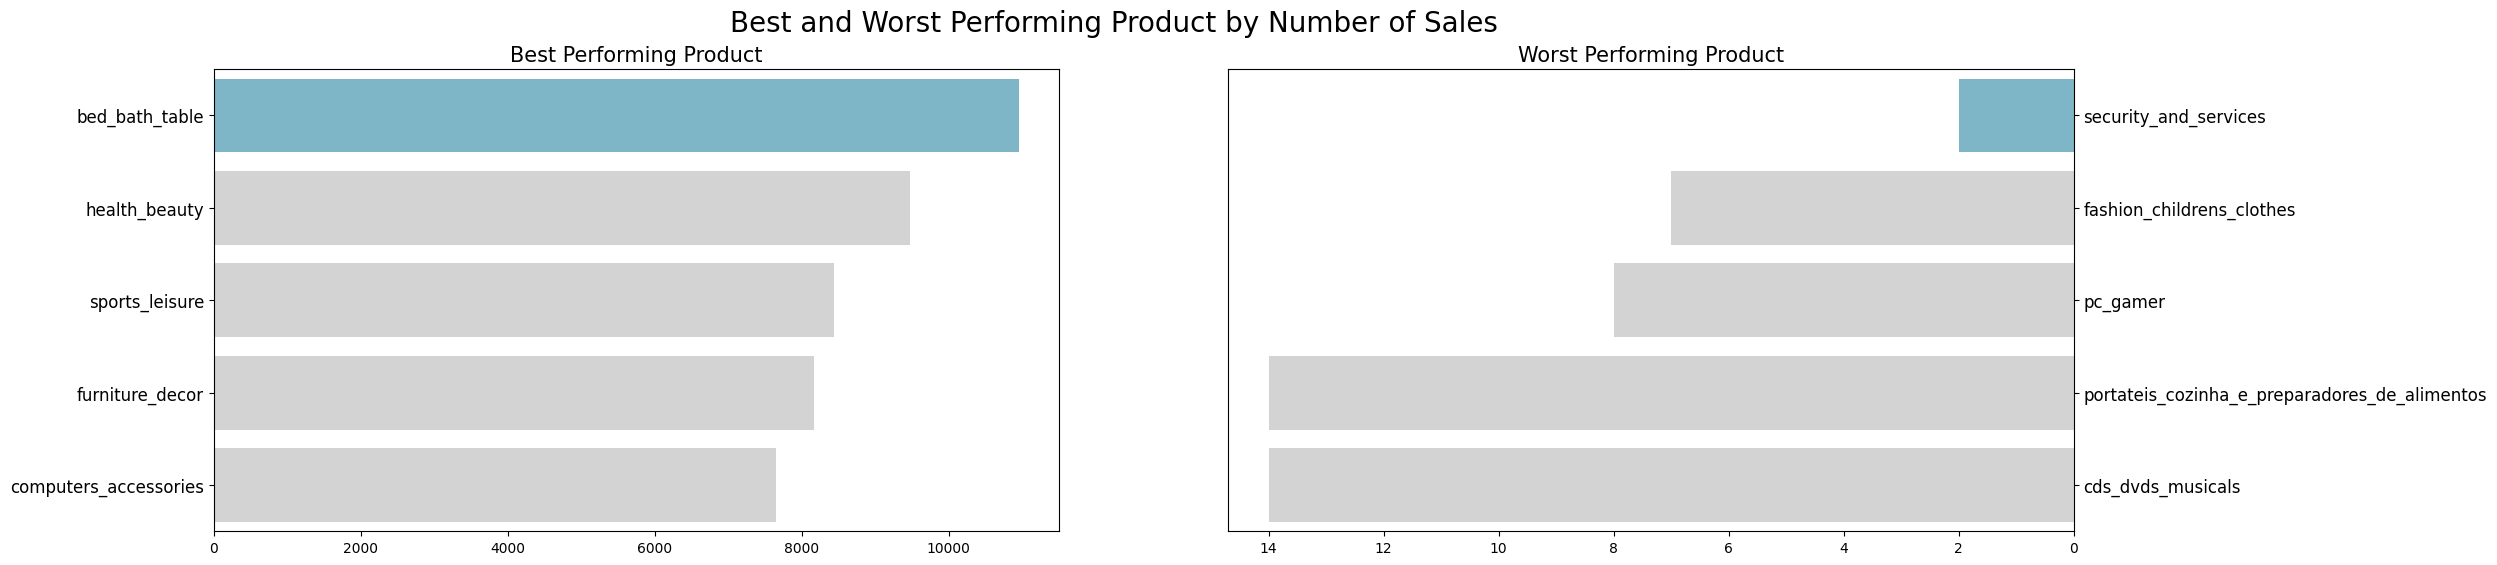

In [ ]:
# VISUALISASI PERTANYAAN 1: PRODUK TERLARIS & TERBURUK
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# GRAFIK 1: 5 Produk Paling Laris
sns.barplot(
    x="quantity",
    y="product_category_name_english",
    data=sum_order_items_df.head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)

# GRAFIK 2: 5 Produk Paling Sedikit Terjual
sns.barplot(
    x="quantity",
    y="product_category_name_english",
    data=sum_order_items_df.sort_values(by="quantity", ascending=True).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

### Pertanyaan 2:

/tmp/ipython-input-2296761984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


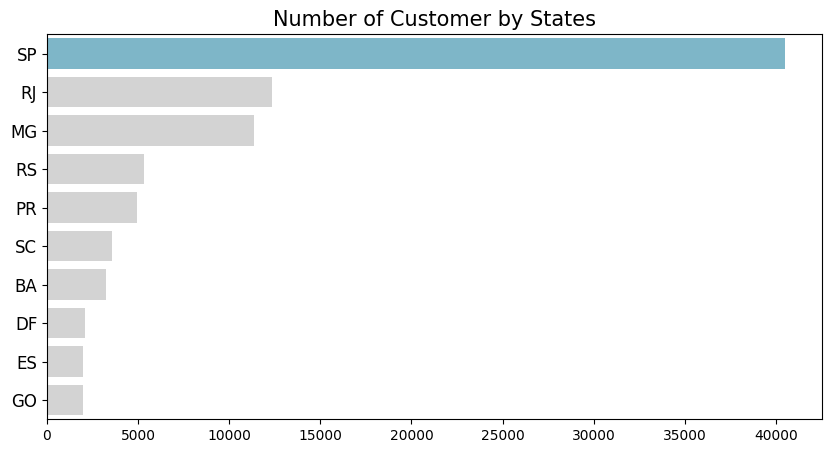

In [ ]:
# VISUALISASI PERTANYAAN 2: DEMOGRAFI PELANGGAN
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(
    x="customer_count",
    y="customer_state",
    data=bystate_df.sort_values(by="customer_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight & Explanatory Analysis:**

**1. Analisis Kinerja Produk (Grafik 1):**
- **Dominasi Kategori:** Terlihat sangat jelas bahwa kategori `bed_bath_table` (Perlengkapan Rumah), `health_beauty`, dan `sports_leisure` adalah penopang utama penjualan. Grafik batang pada produk terlaris menjulang tinggi dibandingkan kategori lainnya.
- **Produk Kurang Diminati:** Sebaliknya, terdapat kategori seperti `security_and_services` yang penjualannya hampir mendekati nol.
- **Rekomendasi:** Perusahaan sebaiknya memfokuskan budget marketing pada 3-5 kategori teratas karena terbukti pasarnya besar, atau membuat strategi bundling untuk mendongkrak produk yang kurang laku.

**2. Analisis Sebaran Pelanggan (Grafik 2):**
- **Pusat Ekonomi:** Grafik demografi menunjukkan ketimpangan yang ekstrem. Negara bagian **Sao Paulo (SP)** memiliki batang yang jauh lebih panjang dari yang lain (lebih dari 40 ribu customer).
- **Konsentrasi Wilayah:** Jika diperhatikan, peringkat 1 (SP), 2 (RJ), dan 3 (MG) semuanya berada di wilayah Tenggara Brazil (Southeast Region).
- **Implikasi:** Ini menunjukkan bahwa basis pelanggan sangat terpusat di kota-kota besar. Distribusi logistik dan gudang penyimpanan sebaiknya diprioritaskan di area ini untuk menekan ongkos kirim dan mempercepat pengiriman.

## Analisis Lanjutan (RFM Analysis)

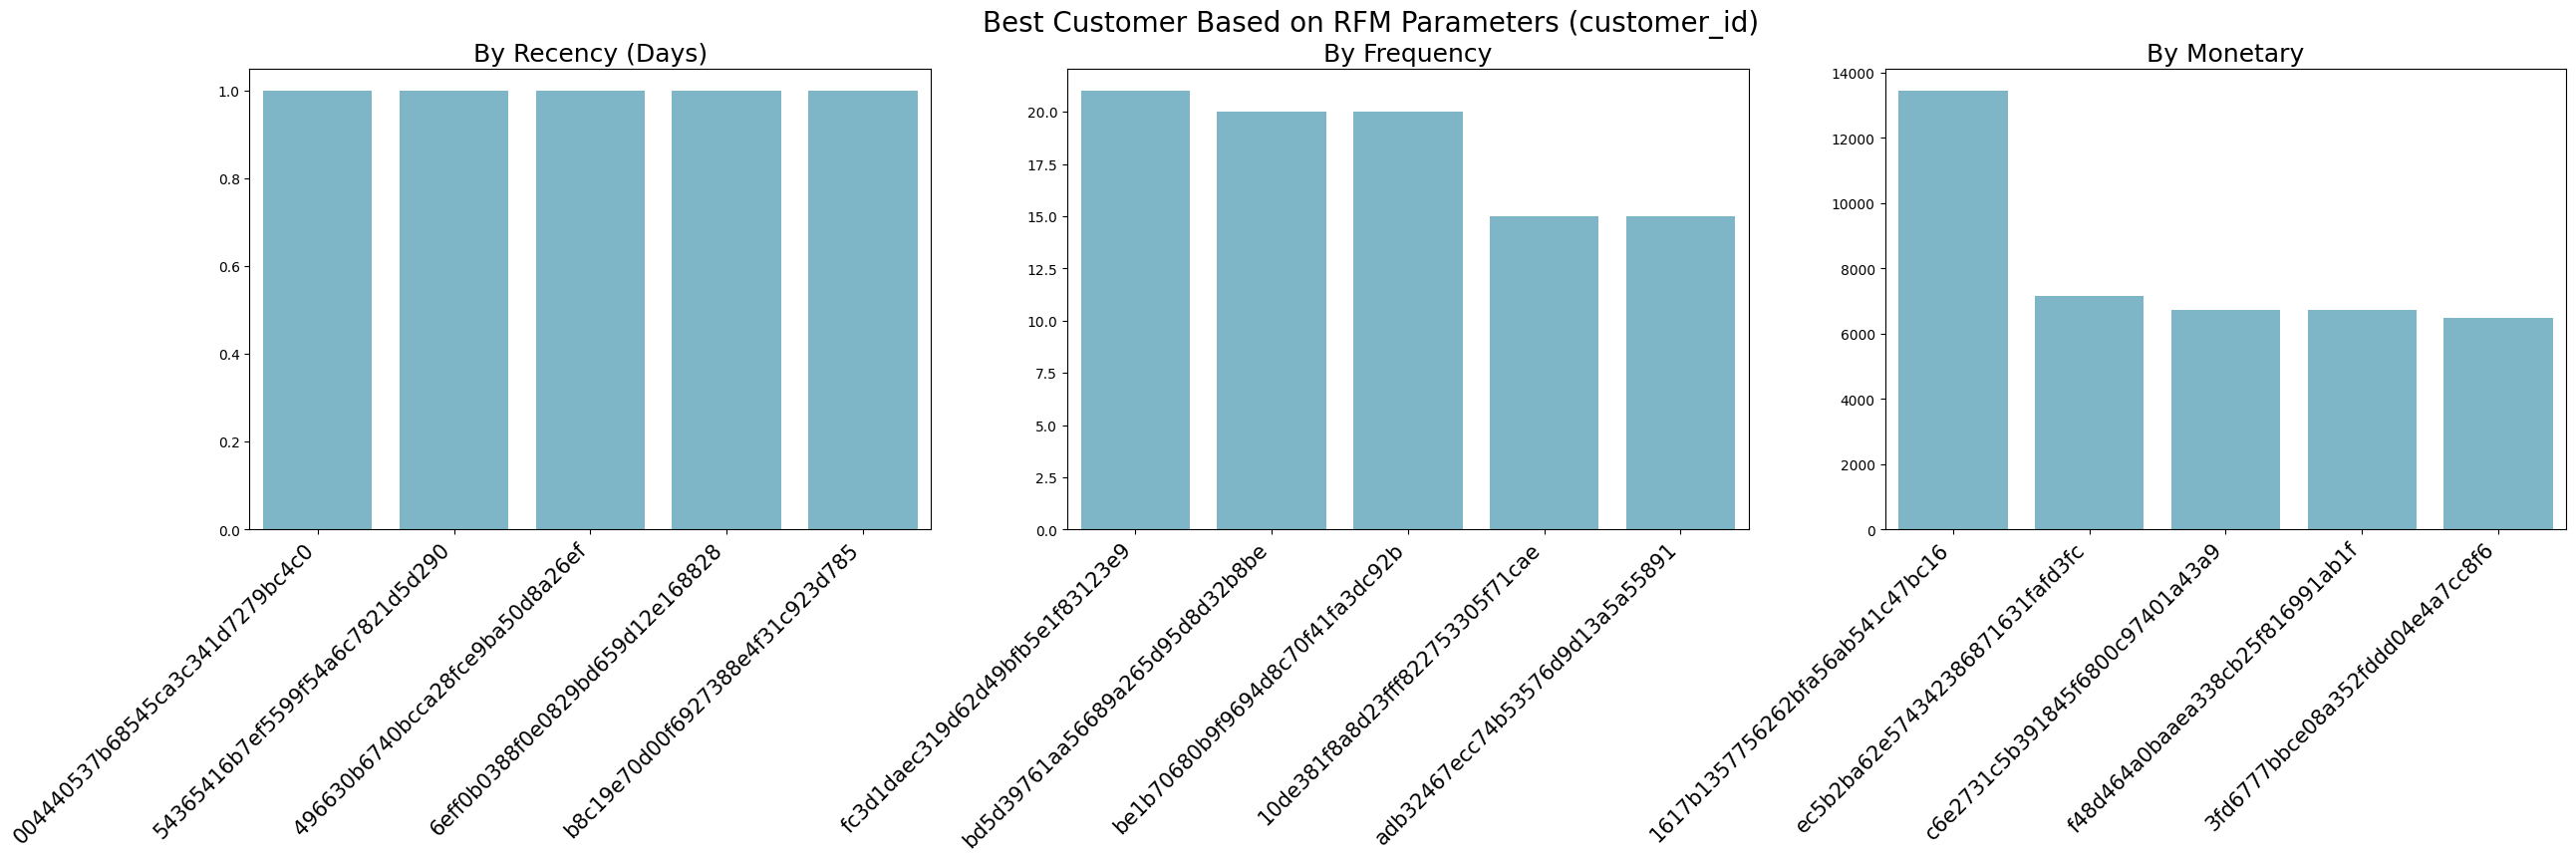

In [ ]:
# 1. Menyiapkan Data
recent_date = main_data["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

rfm_df = main_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": lambda x: (recent_date - x.max()).days,
    "order_id": "count",
    "price": "sum"
})
rfm_df.columns = ["customer_id", "recency", "frequency", "monetary"]

# 2. Visualisasi RFM
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]

# --- PLOT 1: RECENCY ---
sns.barplot(
    y="recency", x="customer_id",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors, hue="customer_id", legend=False, ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (Days)", loc="center", fontsize=18)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)

# --- PLOT 2: FREQUENCY ---
sns.barplot(
    y="frequency", x="customer_id",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors, hue="customer_id", legend=False, ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].set_xticks(ax[1].get_xticks())
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)

# --- PLOT 3: MONETARY ---
sns.barplot(
    y="monetary", x="customer_id",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors, hue="customer_id", legend=False, ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].set_xticks(ax[2].get_xticks())
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

**Insight:**

1.  **By Recency (Kapan Terakhir Belanja):**
    - Grafik menunjukkan pelanggan dengan nilai *Recency* terendah (dalam hari). Semakin kecil angkanya, semakin bagus.
    - Kita bisa melihat ada pelanggan yang baru saja bertransaksi beberapa hari yang lalu. Ini menandakan bahwa platform masih aktif digunakan dan memiliki basis pengguna yang "hangat" (engaged).

2.  **By Frequency (Seberapa Sering Belanja):**
    - Meskipun mayoritas pelanggan hanya berbelanja satu kali, grafik ini menunjukkan adanya **sekelompok kecil pelanggan loyal** yang bertransaksi hingga lebih dari 15-20 kali.
    - Pelanggan-pelanggan dengan frekuensi tinggi ini sangat langka dan berharga. Perusahaan harus mempelajari perilaku mereka: kenapa mereka mau belanja terus? Apakah mereka reseller? Ini insight penting untuk strategi marketing.

3.  **By Monetary (Total Belanja):**
    - Grafik ini menampilkan *Big Spenders*. Ada pelanggan yang sekali transaksi bisa menghabiskan nominal yang sangat besar.
    - Pelanggan-pelanggan ini adalah aset yang berharga. Strategi bisnis yang tepat adalah memberikan pelayanan khusus atau penawaran premium kepada mereka agar tidak pindah ke kompetitor.

## Conclusion

- **Conclution Pertanyaan 1 (Produk Terlaris):**
  Berdasarkan hasil analisis, kategori produk yang paling banyak terjual adalah **`bed_bath_table`** (perlengkapan tidur & mandi), diikuti oleh `health_beauty` dan `sports_leisure`. Hal ini menunjukkan bahwa pelanggan Olist cenderung mencari produk kebutuhan sehari-hari dan gaya hidup. Sebaliknya, kategori seperti `security_and_services` memiliki angka penjualan yang sangat rendah dan perlu dievaluasi strategi pemasarannya.

- **Conclution Pertanyaan 2 (Demografi Pelanggan):**
  Berdasarkan analisis geospasial, basis pelanggan Olist sangat terkonsentrasi di negara bagian **Sao Paulo (SP)**, yang merupakan pusat ekonomi Brazil. Jumlah pelanggan di SP jauh mengungguli daerah lain, bahkan hampir 4 kali lipat dari posisi kedua (Rio de Janeiro). Ini mengindikasikan bahwa strategi logistik dan promosi sebaiknya diprioritaskan di wilayah Tenggara Brazil untuk efisiensi maksimal.

In [ ]:
# Simpan data bersih ke file CSV baru untuk dipakai di Dashboard
main_data.to_csv("main_data.csv", index=False)
print("Berhasil menyimpan 'main_data.csv'!")

Berhasil menyimpan 'main_data.csv'!
